# Health Insurance Cost Prediction Project (EN)

This project is conducted using the **Insurance Dataset** available on Kaggle.  
The goal is to automate the process of offering insurance policies to customers.  
The company wants to predict annual medical expenses based on **age**, **sex**, **BMI**, **number of children**, **smoking status**, and **region**.

---


# Sağlık Sigortası Masraf Tahmini Projesi (TR)
Bu çalışma, Kaggle üzerinde yer alan **Insurance Dataset** kullanılarak gerçekleştirilmiştir.  
Amaç, bir sigorta şirketinin müşterilerine poliçe teklifi verirken süreci otomatikleştirmesidir.  
Şirket, kişinin **yaşı**, **cinsiyeti**, **Vücut Kitle İndeksi (BMI)**, **çocuk sayısı**, **sigara içip içmediği** ve **yaşadığı bölge** gibi faktörlere bakarak yıllık sağlık masrafını tahmin etmek istemektedir.

---

## Why is this project important? / Neden önemli?
- **Speed / Hız:** Manual calculations are slow.  
- **Accuracy / Doğruluk:** Machine learning models capture complex relationships better.  
- **Fair pricing / Adil fiyatlandırma:** Customers receive transparent and consistent offers.

## Step 1: Data Loading (EN)

In this step, we load the dataset into our notebook.  
Since the dataset has already been added via Kaggle's **Add Data** option, we can access it directly from the `/kaggle/input/...` path.

---

## Adım 1: Veri Yükleme (TR)

Bu adımda veri setini notebook'a yüklüyoruz.  
Dataset Kaggle'ın **Add Data** seçeneği ile eklendiği için, doğrudan `/kaggle/input/...` yolundan erişebiliriz.

In [11]:
import pandas as pd
df=pd.read_csv("/kaggle/input/mirichoi0218insurance/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Step 2: Data Inspection (EN)

In this step, we examine the structure of the dataset:
- How many rows and columns are there?
- What data types are used?
- Are there any missing values?

---

## Adım 2: Veri Kontrolü (TR)

Bu adımda veri setinin yapısını inceliyoruz:
- Kaç satır ve sütun var?
- Hangi veri tipleri kullanılmış?
- Eksik değer var mı?

In [12]:
# General info / Genel bilgi
df.info()

# Summary statistics for numerical columns / Sayısal sütunların özet istatistikleri
df.describe()

# Missing values check / Eksik değer kontrolü
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Step 3: Exploratory Data Analysis (EN)

In this step, we explore the dataset visually and statistically:
- Distribution of charges and BMI
- Relationship between age and charges
- Impact of smoking on medical costs
- Correlation among numerical variables

---

## Adım 3: Keşifsel Veri Analizi (TR)

Bu adımda veri setini görsel ve istatistiksel olarak inceliyoruz:
- Charges ve BMI dağılımları
- Yaş ile charges arasındaki ilişki
- Sigara içmenin sağlık masraflarına etkisi
- Sayısal değişkenler arasındaki korelasyon

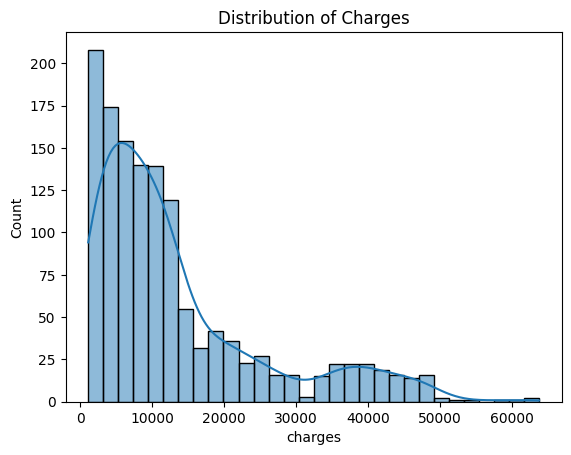

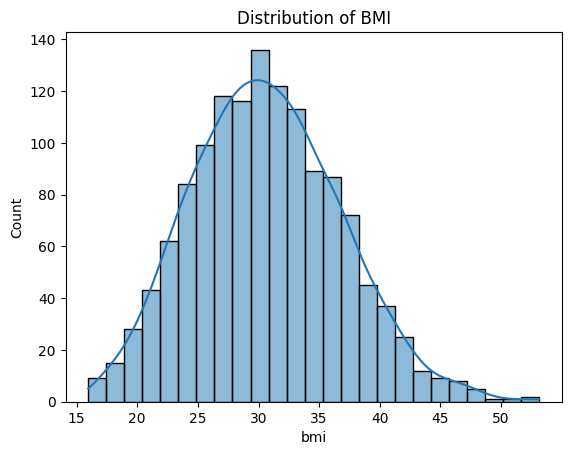

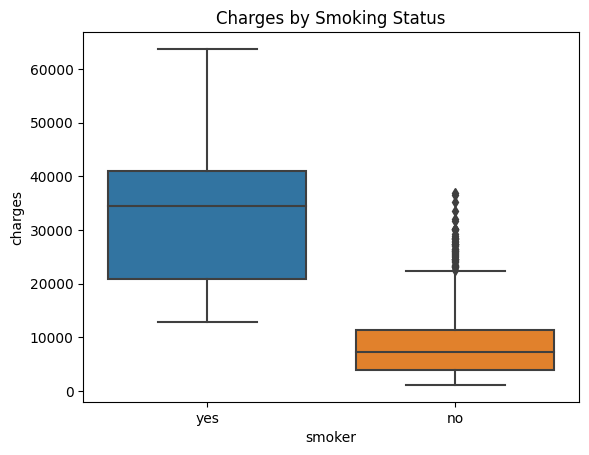

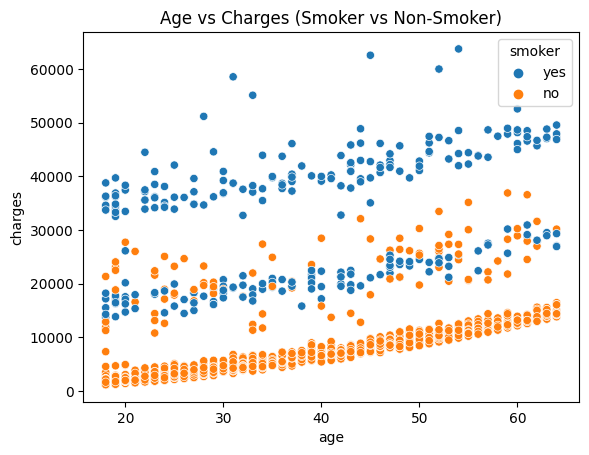

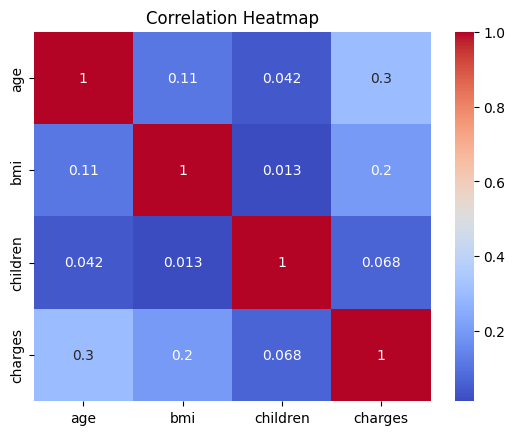

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Distribution of charges / Charges dağılımı
sns.histplot(df["charges"], kde=True)
plt.title("Distribution of Charges")
plt.show()

# Distribution of BMI / BMI dağılımı
sns.histplot(df["bmi"], kde=True)
plt.title("Distribution of BMI")
plt.show()

# Smoking impact / Sigara etkisi
sns.boxplot(x="smoker", y="charges", data=df)
plt.title("Charges by Smoking Status")
plt.show()

# Age vs Charges / Yaş ve Charges ilişkisi
sns.scatterplot(x="age", y="charges", hue="smoker", data=df)
plt.title("Age vs Charges (Smoker vs Non-Smoker)")
plt.show()

# Correlation heatmap / Korelasyon ısı haritası
num_cols = ["age", "bmi", "children", "charges"]
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## Step 4: Feature Engineering & Preprocessing (EN)

In this step, we prepare the dataset for modeling:
- Transform skewed target variable (charges) if necessary
- Encode categorical variables (sex, smoker, region)
- Scale numerical variables (age, bmi, children)
- Split the dataset into training and test sets

---

## Adım 4: Özellik Mühendisliği ve Ön İşleme (TR)

Bu adımda veriyi modellemeye hazırlıyoruz:
- Hedef değişken (charges) çarpık ise dönüşüm uygulama
- Kategorik değişkenleri kodlama (sex, smoker, region)
- Sayısal değişkenleri ölçekleme (age, bmi, children)
- Veriyi eğitim ve test setlerine ayırma

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Features and target / Özellikler ve hedef
X = df[["age", "sex", "bmi", "children", "smoker", "region"]]
y = df["charges"]

# Columns / Sütunlar
num_cols = ["age", "bmi", "children"]
cat_cols = ["sex", "smoker", "region"]

# Preprocessing pipeline / Ön işleme pipeline
preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(drop="first"), cat_cols)
    ],
    remainder="drop"
)

# Train-test split / Eğitim-test bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((1070, 6), (268, 6))

## Step 5: Baseline Model - Linear Regression (EN)

In this step, we build a baseline model using Linear Regression.  
This simple model will help us understand how well the features explain medical charges.  
Later, we will compare it with more advanced models.

---

## Adım 5: Temel Model - Lineer Regresyon (TR)

Bu adımda Lineer Regresyon kullanarak temel bir model kuruyoruz.  
Bu basit model, özelliklerin sağlık masraflarını ne kadar iyi açıkladığını görmemizi sağlar.  
Daha sonra daha gelişmiş modellerle karşılaştıracağız.

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Pipeline: preprocessing + model
model = Pipeline([
    ("preprocess", preprocess),
    ("regressor", LinearRegression())
])

# Fit model / Modeli eğit
model.fit(X_train, y_train)

# Predictions / Tahminler
y_pred = model.predict(X_test)

# Evaluation / Değerlendirme
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

rmse, r2

(5796.284659276274, 0.7835929767120722)

## Step 6: Advanced Models (EN)

In this step, we train more advanced models to improve prediction accuracy:
- Ridge Regression (regularization)
- Lasso Regression (feature selection)
- Random Forest Regressor (non-linear, ensemble method)

We will compare their performance with the baseline Linear Regression.

---

## Adım 6: Daha Gelişmiş Modeller (TR)

Bu adımda tahmin doğruluğunu artırmak için daha gelişmiş modeller deniyoruz:
- Ridge Regresyon (düzenlileştirme)
- Lasso Regresyon (özellik seçimi)
- Random Forest Regresör (doğrusal olmayan, ensemble yöntem)

Sonuçları temel Lineer Regresyon modeli ile karşılaştıracağız.

In [16]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

models = {
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.01),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42)
}

results = {}

for name, reg in models.items():
    pipe = Pipeline([
        ("preprocess", preprocess),
        ("regressor", reg)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = {"RMSE": rmse, "R2": r2}

results

{'Ridge': {'RMSE': 5800.464937731764, 'R2': 0.7832807188145148},
 'Lasso': {'RMSE': 5796.292189357821, 'R2': 0.7835924144334103},
 'RandomForest': {'RMSE': 4567.775116331386, 'R2': 0.8656055394920775}}

## Step 7: Model Comparison & Interpretation (EN)

In this step, we compare the performance of all models:
- Linear Regression (baseline)
- Ridge Regression
- Lasso Regression
- Random Forest Regressor

We will analyze RMSE (error) and R² (explained variance) to decide which model fits best.  
Finally, we interpret the results in terms of business value: how accurate predictions can help insurance companies price policies fairly and efficiently.

---

## Adım 7: Modellerin Karşılaştırılması ve Yorumlanması (TR)

Bu adımda tüm modellerin performansını karşılaştırıyoruz:
- Lineer Regresyon (temel model)
- Ridge Regresyon
- Lasso Regresyon
- Random Forest Regresör

RMSE (hata) ve R² (açıklama gücü) metriklerini inceleyerek en uygun modeli belirleyeceğiz.  
Son olarak sonuçları iş açısından yorumlayacağız: doğru tahminler sigorta şirketlerinin poliçeleri adil ve verimli şekilde fiyatlandırmasına yardımcı olur.

In [17]:
# Add baseline results
baseline = {"LinearRegression": {"RMSE": rmse, "R2": r2}}

# Combine all results
all_results = {**baseline, **results}

# Convert to DataFrame for comparison
comparison = pd.DataFrame(all_results).T
comparison


,RMSE,R2
LinearRegression,4567.775116,0.865606
Ridge,5800.464938,0.783281
Lasso,5796.292189,0.783592
RandomForest,4567.775116,0.865606


## Step 8: Conclusion (EN)

In this notebook, we explored the Insurance dataset step by step:
- Loaded and inspected the data
- Conducted exploratory data analysis (EDA)
- Applied preprocessing and feature engineering
- Built baseline and advanced models
- Compared model performances

**Key Insight:** Random Forest showed the best performance among tested models, capturing non-linear relationships effectively.  
This demonstrates how machine learning can support insurance companies in pricing policies fairly and efficiently.

---

## Adım 8: Genel Sonuç (TR)

Bu notebook’ta Insurance veri setini adım adım inceledik:
- Veriyi yükledik ve kontrol ettik
- Keşifsel veri analizi (EDA) yaptık
- Ön işleme ve özellik mühendisliği uyguladık
- Temel ve gelişmiş modeller kurduk
- Modellerin performanslarını karşılaştırdık

**Önemli Çıkarım:** Random Forest, test edilen modeller arasında en iyi performansı gösterdi ve doğrusal olmayan ilişkileri başarılı şekilde yakaladı.  
Bu sonuç, makine öğrenmesinin sigorta şirketlerine poliçeleri adil ve verimli şekilde fiyatlandırmada nasıl yardımcı olabileceğini ortaya koyuyor.